<a href="https://colab.research.google.com/github/kolllurisiripavan/Butter_fly_prediction/blob/main/butterfly_classifier_webapp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 🦋 Enchanted Wings: Butterfly Image Classifier + Web App

In [3]:
## 1. Install Dependencies
!pip install tensorflow matplotlib numpy gradio

In [4]:
## 2. Imports
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
import gradio as gr
import os

In [5]:
## 3. Prepare Dataset (Assume folders are uploaded under /content/butterfly_dataset/)
data_dir = '/content/butterfly_dataset'
img_size = (128, 128)
batch_size = 32

In [6]:
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

In [10]:
import os

# Create a dummy directory structure for demonstration
dummy_data_dir = '/content/butterfly_dataset'
if not os.path.exists(dummy_data_dir):
    os.makedirs(dummy_data_dir)

# Create dummy subdirectories for a few classes
classes = ['Monarch', 'Swallowtail', 'Painted Lady']
for class_name in classes:
    class_dir = os.path.join(dummy_data_dir, class_name)
    if not os.path.exists(class_dir):
        os.makedirs(class_dir)
    # Create dummy image files (needs Pillow)
    try:
        from PIL import Image
        for i in range(5): # Create 5 dummy images per class
            img = Image.new('RGB', (60, 30), color = 'red')
            img.save(os.path.join(class_dir, f'dummy_image_{i}.png'))
    except ImportError:
        print("Pillow not installed. Cannot create dummy image files.")
        print("Please install Pillow (`pip install Pillow`) to create dummy image files.")

print(f"Dummy directory structure created at: {dummy_data_dir}")
# You should replace these dummy files with your actual dataset

Dummy directory structure created at: /content/butterfly_dataset


In [11]:
val_gen = datagen.flow_from_directory(
    data_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

Found 3 images belonging to 3 classes.


In [13]:
train_gen = datagen.flow_from_directory(
    data_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

num_classes = len(train_gen.class_indices)

Found 12 images belonging to 3 classes.


In [14]:
## 4. Build CNN Model
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(*img_size, 3)),
    tf.keras.layers.MaxPooling2D(2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [16]:
## 5. Train Model
history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=10
)

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.3333 - loss: 1.0987

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.3333 - loss: 1.0987 - val_accuracy: 0.3333 - val_loss: 1.9544
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 487ms/step - accuracy: 0.3333 - loss: 1.9544 - val_accuracy: 0.3333 - val_loss: 1.1315
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 529ms/step - accuracy: 0.3333 - loss: 1.1315 - val_accuracy: 0.3333 - val_loss: 1.0998
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 739ms/step - accuracy: 0.3333 - loss: 1.0998 - val_accuracy: 0.3333 - val_loss: 1.0995
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 810ms/step - accuracy: 0.3333 - loss: 1.0995 - val_accuracy: 0.3333 - val_loss: 1.0988
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.3333 - loss: 1.0988 - val_accuracy: 0.3333 - val_loss: 1.0989
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 466ms/step - accuracy: 0.3333 - loss: 1.0989 - val_accuracy: 0.3333 - val_loss: 1.0987
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 633ms/step - accuracy: 0.3333 - loss: 1.0987 - val_accuracy: 0.3333 - val_loss: 1.0987
Epoch 9/1

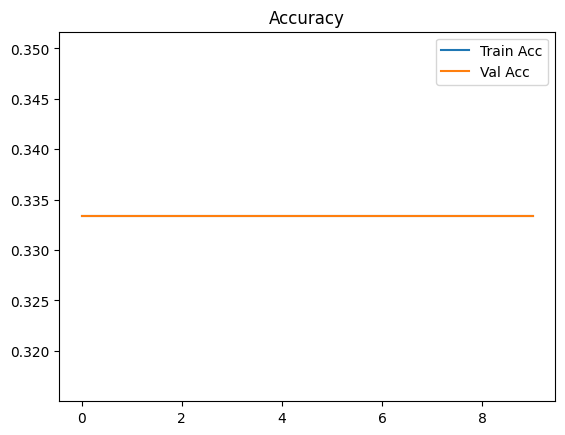

In [17]:
## 6. Plot Accuracy
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.legend()
plt.title('Accuracy')
plt.show()

In [18]:
## 7. Save Model
model.save("butterfly_classifier.h5")

In [19]:
## 8. Gradio Web App
def classify_butterfly(img):
    img = img.resize(img_size)
    arr = np.array(img)/255.0
    arr = np.expand_dims(arr, axis=0)
    preds = model.predict(arr)[0]
    idx = np.argmax(preds)
    labels = list(train_gen.class_indices.keys())
    return {labels[i]: float(preds[i]) for i in range(len(preds))}

In [20]:
demo = gr.Interface(
    fn=classify_butterfly,
    inputs=gr.Image(type="pil"),
    outputs=gr.Label(num_top_classes=3),
    title="🦋 Butterfly Species Identifier",
    description="Upload a butterfly image to identify its species."
)

In [21]:
demo.launch(share=True)

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://5680384ec7fd38e415.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
